## https://www.kaggle.com/gpreda/porto-seguro-exploratory-analysis-and-prediction



## 개념https://hoony-gunputer.tistory.com/144?category=742600

In [1]:
##분석용 패키지 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score



from sklearn.linear_model import LogisticRegression

pd.set_option('display.max_columns',100)

In [2]:
##데이터 읽기 
trainset = pd.read_csv("C:/Users/USER/Desktop/kaggle/car/train.csv")
testset = pd.read_csv("C:/Users/USER/Desktop/kaggle/car/test.csv")

In [3]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


In [4]:
## 
trainset.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [5]:
trainset.info(True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [6]:
print('Train dataset (rows,cols):',trainset.shape,'\nTest dataset (rows,cols):',testset.shape)

Train dataset (rows,cols): (595212, 59) 
Test dataset (rows,cols): (892816, 58)


In [8]:
print('Columns in tran and not in test dataset:',set(trainset.columns)-set(testset.columns))

Columns in tran and not in test dataset: {'target'}


## 소개 
use: input, ID, target
type: nominal, interval, ordinal, binary
preserve: True or False
dataType: int, float, char
category: ind, reg, car, calc

In [5]:
data = []
for feature in trainset.columns:
    # Defining the role
    if feature == 'target':
        use = 'target'
    elif feature == 'id':
        use = 'id'
    else:
        use = 'input'
         
    # Defining the type
    if feature == 'target':
        type = 'binary'
    elif 'bin' in feature :
        type = 'binary'
    elif feature == 'id':
        type = 'categorical'
    elif 'cat' in feature :
        type = 'categorical'
    elif trainset[feature].dtype == float or isinstance(trainset[feature].dtype, float):
        type = 'real'
    else:
        type = 'integer'
        
    # Initialize preserve to True for all variables except for id
    preserve = True
    if feature == 'id':
        preserve = False
    
    # Defining the data type 
    dtype = trainset[feature].dtype
    
    category = 'none'
    # Defining the category
    if 'ind' in feature:
        category = 'individual'
    elif 'reg' in feature:
        category = 'registration'
    elif 'car' in feature:
        category = 'car'
    elif 'calc' in feature:
        category = 'calculated'
    
    
    # Creating a Dict that contains all the metadata for the variable
    feature_dictionary = {
        'varname': feature,
        'use': use,
        'type': type,
        'preserve': preserve,
        'dtype': dtype,
        'category' : category
    }
    data.append(feature_dictionary)
    
metadata = pd.DataFrame(data, columns=['varname', 'use', 'type', 'preserve', 'dtype', 'category'])
metadata.set_index('varname', inplace=True)
metadata

,use,type,preserve,dtype,category
varname,,,,,
id,id,categorical,False,int64,none
target,target,binary,True,int64,none
ps_ind_01,input,integer,True,int64,individual
ps_ind_02_cat,input,categorical,True,int64,individual
ps_ind_03,input,integer,True,int64,individual
ps_ind_04_cat,input,categorical,True,int64,individual
ps_ind_05_cat,input,categorical,True,int64,individual
ps_ind_06_bin,input,binary,True,int64,individual
ps_ind_07_bin,input,binary,True,int64,individual


메타데이터 만들기
변수 타입 / 데이터 타입 / 데이터 속성

In [73]:
trainset.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_car_11_cat_te
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.610991,0.439184,0.551102,8.295933,0.829931,0.725192,6.555340,0.910027,0.832080,1.328890,0.992136,2.346072,0.379945,0.813265,0.276256,3.065899,0.036447
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.287643,0.404264,0.793506,2.508270,0.375716,2.153463,5.501445,0.347106,0.373796,0.978747,0.091619,0.832548,0.058327,0.224588,0.357154,0.731366,0.009384
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.017716
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.525000,7.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.316228,0.670867,0.333167,2.828427,0.028870
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.720677,7.000000,1.000000,0.000000,7.000000,1.000000,1.000000,2.000000,1.000000,3.000000,0.374166,0.765811,0.368782,3.316625,0.035423
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,0.000000,0.000000,0.900000,0.600000,1.000000,11.000000,1.000000,0.000000,11.000000,1.000000,1.000000,2.000000,1.000000,3.000000,0.400000,0.906190,0.396485,3.605551,0.044263
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,13.000000,1.000000,1.000000,1.000000,0.900000,1.800000,4.037945,11.000000,1.000000,9.000000,17.000000,1.000000,1.000000,4.000000,2.000000,3.000000,1.264911,3.720626,0.636396,3.741657,0.077491


In [10]:
metadata[(metadata.type=='categorical')&(metadata.preserve)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

범주형 속성 컬럼확인

In [11]:
pd.DataFrame({'count':metadata.groupby(['category'])['category'].size()}).reset_index()

,category,count
0,calculated,20
1,car,16
2,individual,18
3,none,2
4,registration,3


전체 데이터 속성확인


## 코드의 차이가 잘모겟음 왜 ['category'] 추가??

In [14]:
pd.DataFrame({'count':metadata.groupby(['use','type'])['use'].size()}).reset_index()

,use,type,count
0,id,categorical,1
1,input,binary,17
2,input,categorical,14
3,input,integer,16
4,input,real,10
5,target,binary,1


In [17]:
## 컬럼 특성 현황 

In [19]:
trainset['target'].value_counts().index.values

array([0, 1], dtype=int64)

<Figure size 432x288 with 0 Axes>

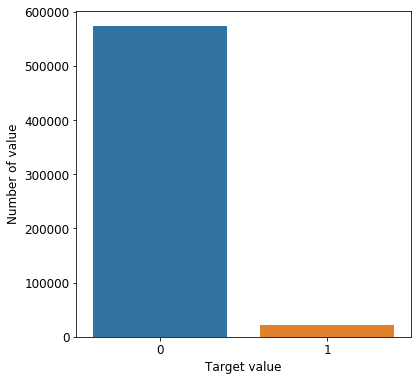

In [15]:
## 분석 및 통게
##타켓에 대해서 
plt.figure()
fig,ax = plt.subplots(figsize=(6,6))
x = trainset['target'].value_counts().index.values## 타켓 0,1 값 구분
y = trainset['target'].value_counts().values ## 타켓 변수 0,1 수
##Bar plot
#Order the bars 

sns.barplot(ax=ax, x=x, y=y)
plt.ylabel('Number of value',fontsize=12)
plt.xlabel('Target value',fontsize = 12)
plt.tick_params(axis = 'both',which='major',labelsize=12)
plt.show()

전체데이터 셋중 3.64%만 1이다. 너무 불균형이다. 그래서 언더샘플링or 오버샘플링 선택해야 됨, 데이터 수가 많기 때문에 언더샘플링이 적합하다고 판단됨

In [19]:
#real 타입 변수 통계량
variable = metadata[(metadata.type=='real')&(metadata.preserve)].index
trainset[variable].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


ps_reg_03, ps_car_12, ps_car_14가 결측값이 확인됨 (데이터 셋에서 -1 값이 결측값으로 지정됨)

In [22]:
(pow(trainset['ps_car_12']*10,2)).head(10)   ## pow(2,3)  2의 3승 

0    16.00
1    10.00
2    10.00
3    14.00
4     9.99
5    19.89
6    10.00
7    19.98
8    16.00
9    20.00
Name: ps_car_12, dtype: float64

In [23]:
(pow(trainset['ps_car_15'],2)).head(10)

0    13.0
1     6.0
2    11.0
3     4.0
4     4.0
5     9.0
6    10.0
7    11.0
8     8.0
9    13.0
Name: ps_car_15, dtype: float64

missing values 처리 

C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


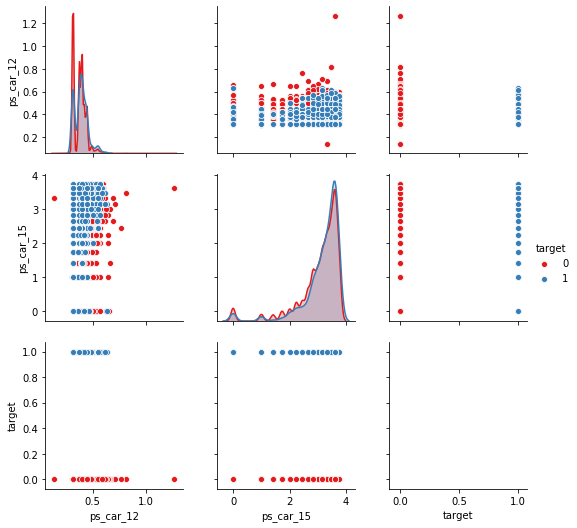

In [24]:
sample = trainset.sample(frac = 0.05)  ## 샘플중 5%만 추출 
var = ['ps_car_12','ps_car_15','target']
sample = sample[var]
sns.pairplot(sample,hue = 'target',palette = 'Set1',diag_kind = 'kde') ## daig_kind =' kde' 변수간의 산점도 행렬을 통한 커널밀도 추정
plt.show()

## Calculated 속성

<Figure size 432x288 with 0 Axes>

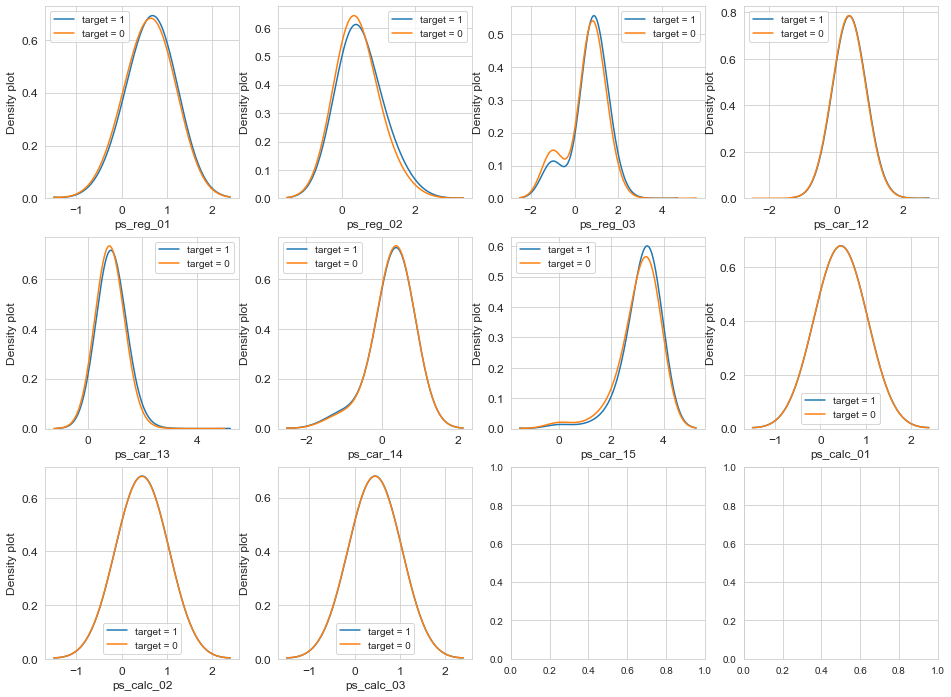

In [20]:
var = metadata[(metadata.type == 'real') & (metadata.preserve)].index
t1 = trainset.loc[trainset['target'] != 0]  ## target 1인 데이터만 선택
t0 = trainset.loc[trainset['target'] == 0]  ## target 0인 데이터만 선택

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(3,4,figsize = (16,12))

i = 0
for feature in var:
    i += 1
    plt.subplot(3,4,i)
    sns.kdeplot(t1[feature], bw = 0.5, label = 'target = 1')
    sns.kdeplot(t0[feature], bw = 0.5, label = 'target = 0')
    plt.ylabel('Density plot', fontsize = 12)
    plt.xlabel(feature, fontsize = 12 )
    locs, labels = plt.xticks()
    plt.tick_params(axis = 'both',which = 'major',labelsize = 12)
plt.show()

ps_calc_01, ps_calc_02, ps_calc_03 이외에 변수에 타켓에 대한 분포가 다름

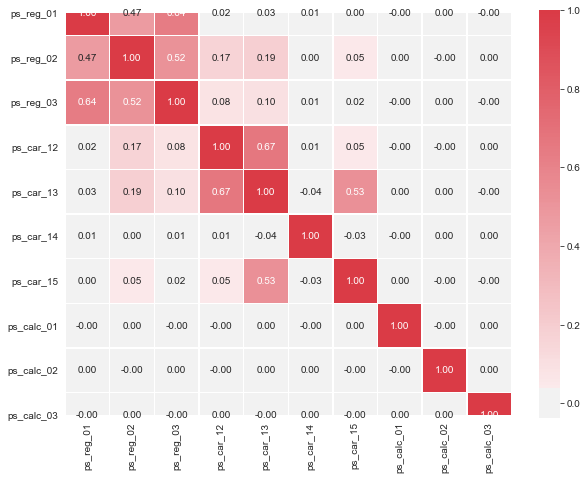

In [26]:
def corr_heatmap(var):  ## 상관계수 함수 만들기 
    correlations = trainset[var].corr()  ##test set에서 각 변수 상관계수 구하기
    
    ## 
    cmap = sns.diverging_palette(50, 10, as_cmap = True)
    
    fig, ax = plt.subplots(figsize = (10, 10))
    sns.heatmap(correlations, cmap = cmap, vmax = 1.0, center = 0, fmt = '.2f',
               square = True, linewidths = .5, annot = True, cbar_kws = {'shrink': .75})
    plt.show()

var = metadata[(metadata.type == 'real') & (metadata.preserve)].index

corr_heatmap(var)

ps_reg_01 with ps_reg_02 (0.47);
ps_reg_01 with ps_reg_03 (0.64);
ps_reg_02 with ps_reg_03 (0.52);
ps_car_12 with ps_car_13 (0.67);
ps_car_13 with ps_car_15 (0.53);
2%로만 사용 

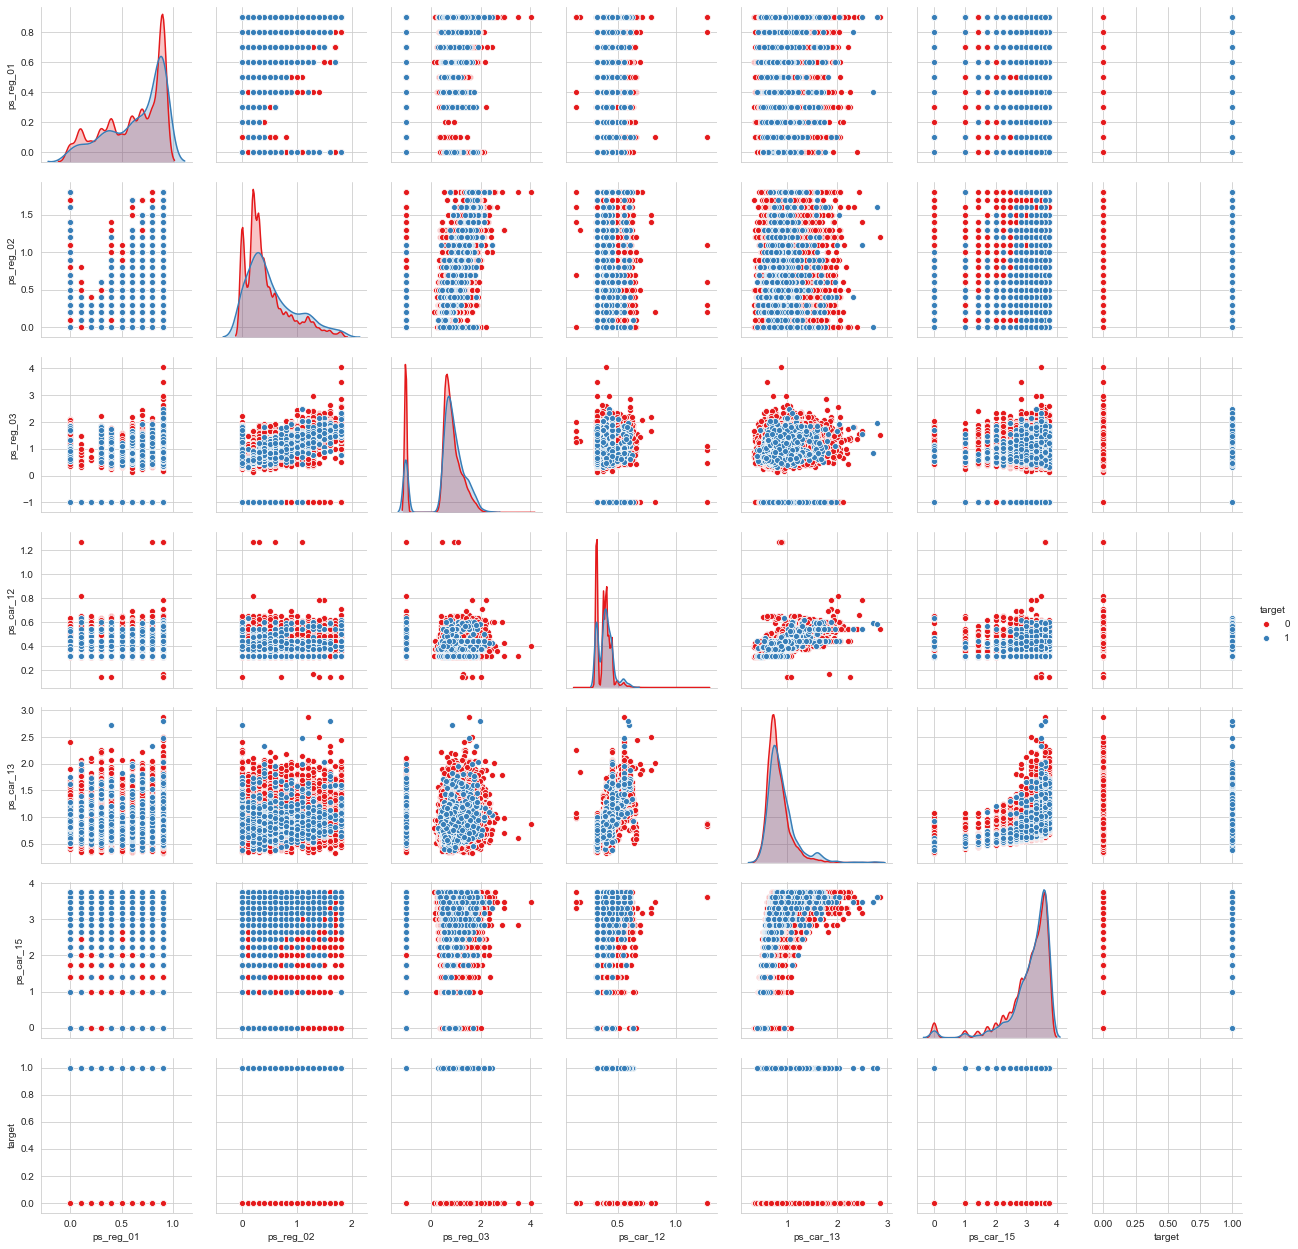

In [27]:
sample =trainset.sample(frac =0.05)
var = ['ps_reg_01','ps_reg_02','ps_reg_03','ps_car_12','ps_car_13','ps_car_15','target']
sample = sample[var]
sns.pairplot(sample, hue = 'target',palette = 'Set1',diag_kind = 'kde')
plt.show()

In [28]:
## Binay features
v =metadata[(metadata.type =='binary')&(metadata.preserve)].index
trainset[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x0000019F07EEE3C8> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists


<Figure size 432x288 with 0 Axes>

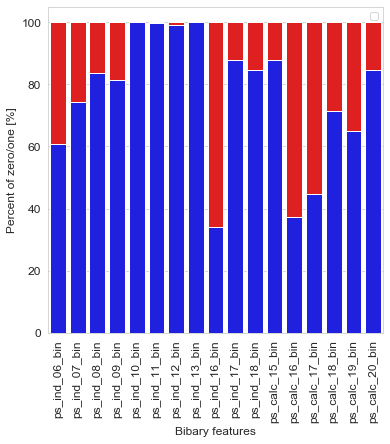

In [30]:
bin_col = [col for col in trainset.columns if '_bin' in col] ## 만약 trainset.columns에 '_bin'이 포함되는 변수만 반복
zero_list = [] 
one_list = []

for col in bin_col:
    zero_list.append((trainset[col]==0).sum()/trainset.shape[0]*100)  # 각 변수에서 0인 비율 
    one_list.append((trainset[col]==1).sum()/trainset.shape[0]*100)   # 각 변수에서 1인 비율 
plt.figure()
fig, ax = plt.subplots(figsize = (6,6))
## Bar plot

p1 = sns.barplot(ax =ax , x= bin_col, y= zero_list, color = 'blue')
p2 = sns.barplot(ax = ax , x = bin_col, y=one_list, bottom = zero_list, color = 'red')
plt.ylabel('Percent of zero/one [%]', fontsize = 12)
plt.xlabel('Bibary features', fontsize = 12 )
locs, labels = plt.xticks()
plt.setp(labels, rotation = 90)
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.legend((p1,p2),('Zero','One')) # 범례 변경
plt.show()

ps_ind_16_bin, ps_calc_16_bin, ps_calc_17_bin 변수는 1인 값이 60%이상이며, 그외 변수들은 40% 이하를 유지하고 있으며, 적은 비율은 가지고 있는 변수는
ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin 이다.

<Figure size 432x288 with 0 Axes>

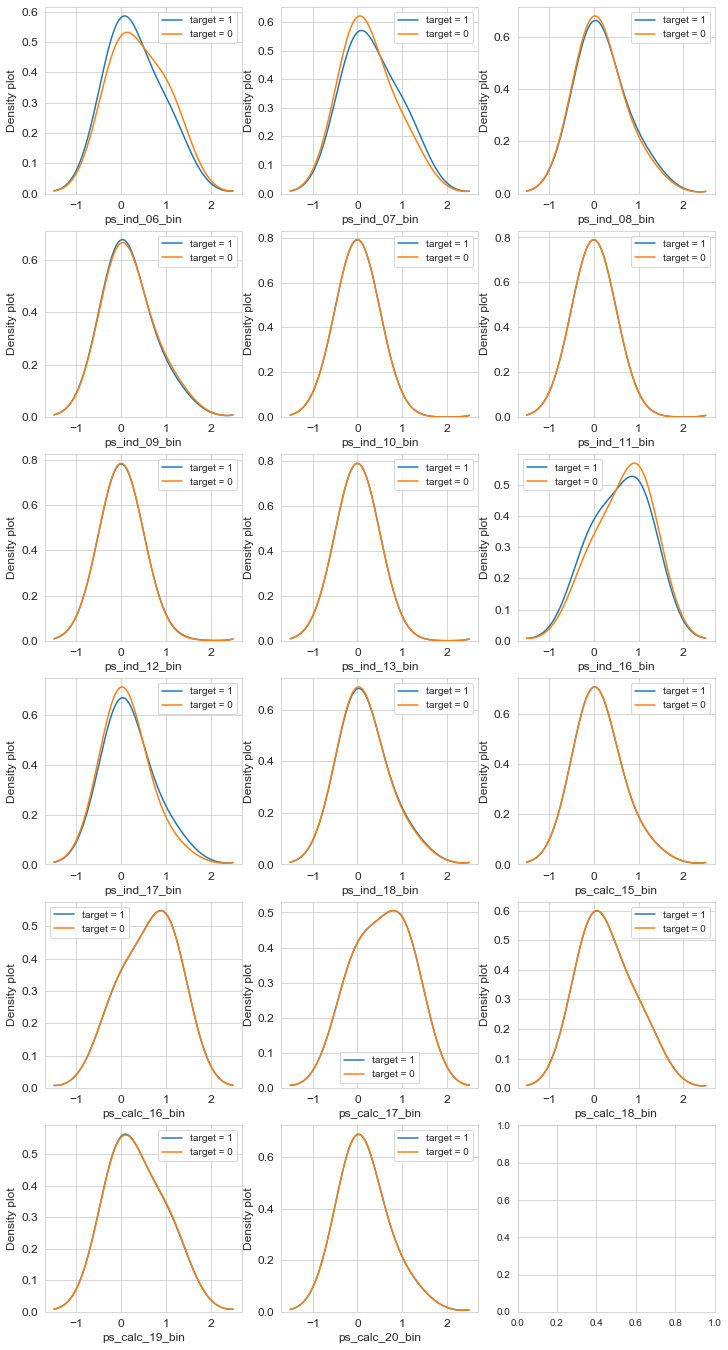

In [36]:
var = metadata[(metadata.type =='binary')&(metadata.preserve)].index  ## binary 데이터 타입만 선택
var = [col for col in trainset.columns if '_bin' in col]   ## 만약 trainset.columns에 '_bin'이 포함되는 변수만 반복
i = 0
t1 = trainset.loc[trainset['target'] !=0]
t0 = trainset.loc[trainset['target'] ==0]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(6,3,figsize = (12,24))

for feature in var:
    i +=1
    plt.subplot(6,3,i)
    sns.kdeplot(t1[feature],bw = 0.5,label = 'target = 1')
    sns.kdeplot(t0[feature],bw = 0.5, label = 'target = 0')
    plt.ylabel('Density plot', fontsize =12)
    plt.xlabel(feature, fontsize = 12)
    locs, labels = plt.xticks()
    plt.tick_params(axis ='both', which = 'major',labelsize =12)
plt.show()

ps_ind_06_bin, ps_ind_07_bin, ps_ind_16_bin, ps_ind_17_bin는 0,1에 대해서 분포형태가 크게 다르며, ps_ind_08_bin은 분포 형태가 조금 다르다. 
이외에 변수에서는 유사하 분포형태를 가지고 있다.

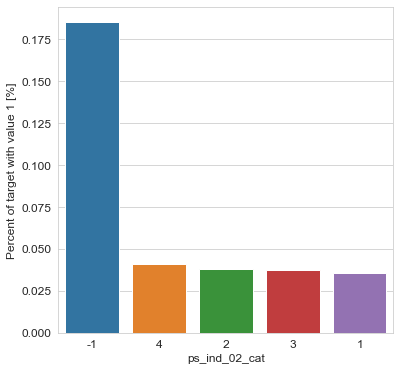

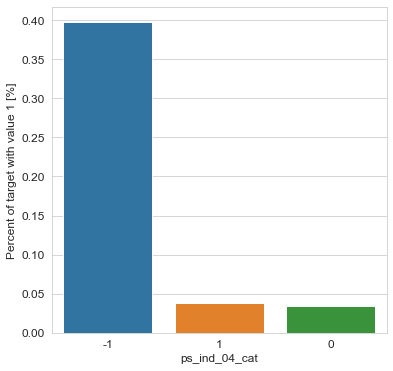

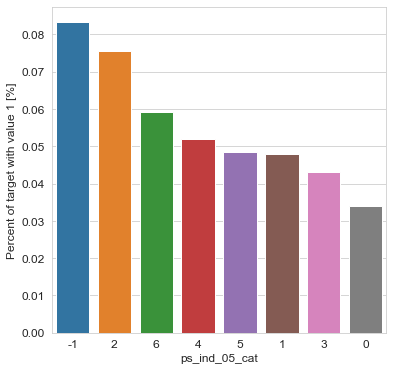

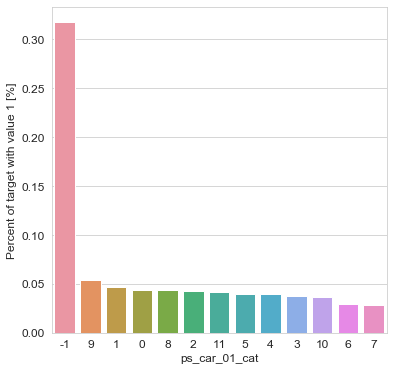

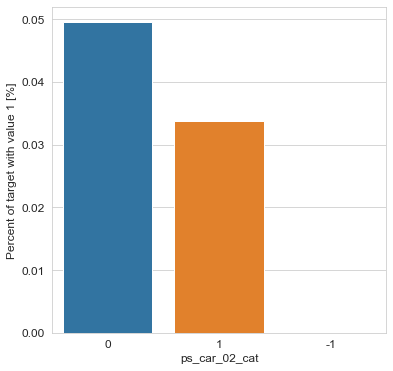

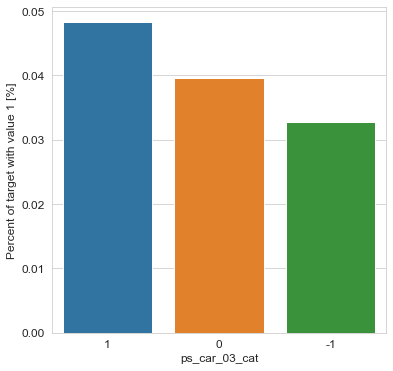

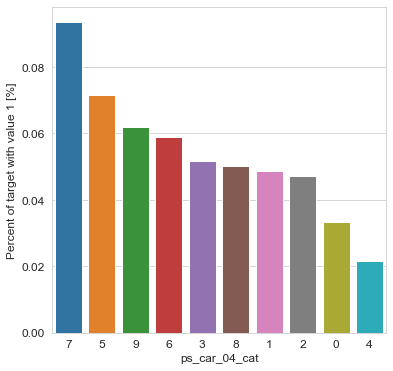

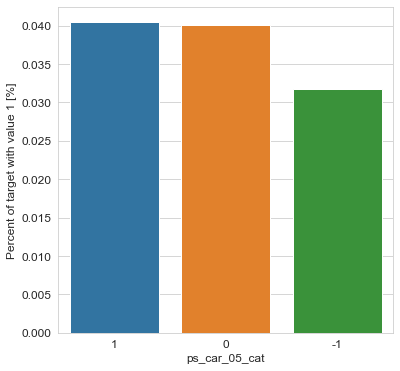

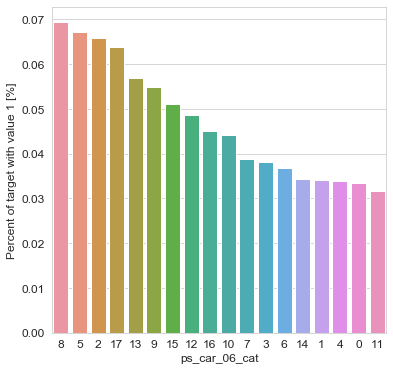

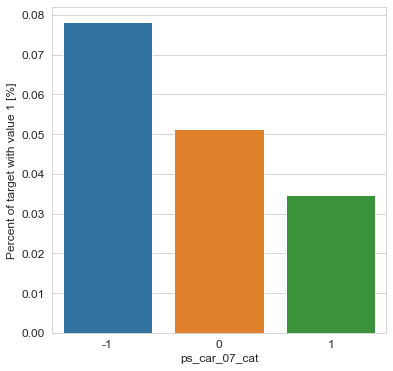

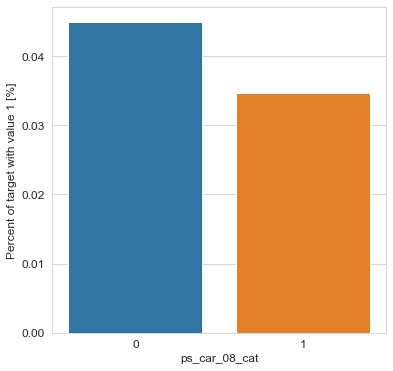

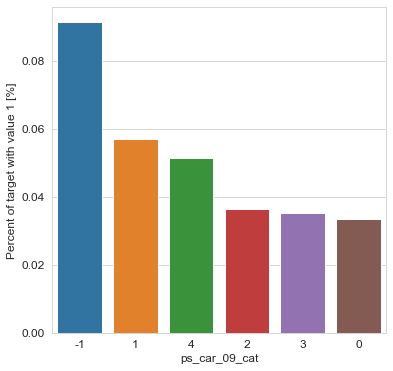

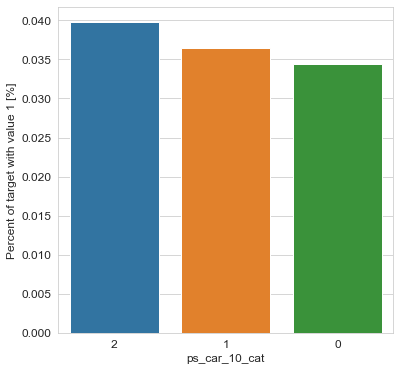

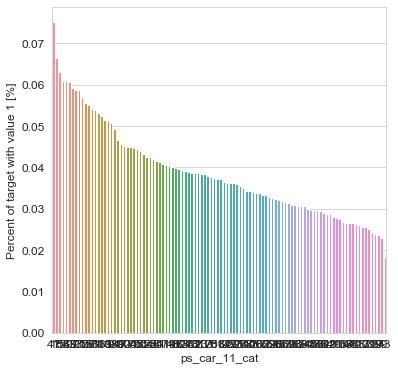

In [31]:
## 범주형 변수 
var = metadata[(metadata.type =='categorical') & (metadata.preserve)].index  ## 범주형 변수만 선택


for feature in var: 
    fig, ax =plt.subplots(figsize=(6,6))
    # 퍼센트지 계산 
    cat_perc = trainset[[feature,'target']].groupby([feature],as_index=False).mean() ## 변수 각 속성에 대해서 평균값 구하기
    cat_perc.sort_values(by = 'target',ascending = False, inplace = True)  ## 내림차순으로 정렬
    # bar plot
    # order ther bars descending on target mean
    
    sns.barplot(ax = ax, x = feature, y='target',data = cat_perc,order = cat_perc[feature])
    plt.ylabel('Percent of target with value 1 [%]', fontsize =12)
    plt.xlabel(feature, fontsize = 12)
    plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
    plt.show()

<Figure size 432x288 with 0 Axes>

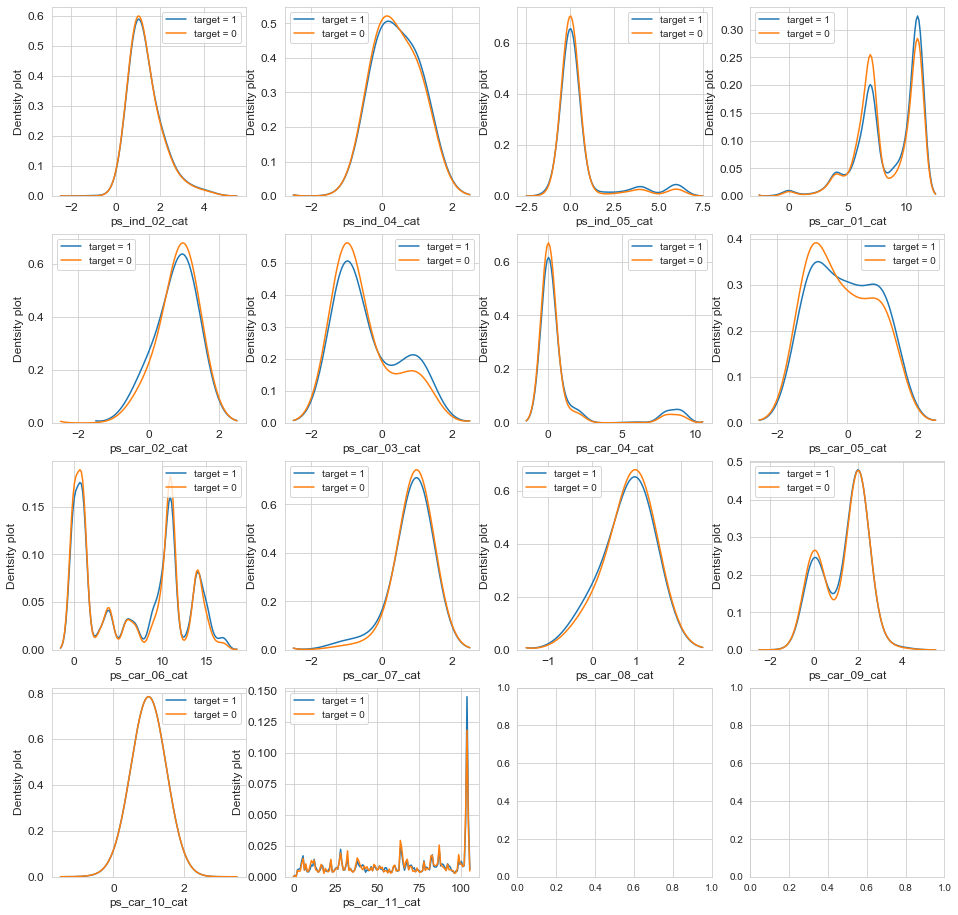

In [32]:
var = metadata[(metadata.type =='categorical') & (metadata.preserve)].index ## 범주형 변수만 선택
i = 0
t1 = trainset.loc[trainset['target'] !=0]
t0 = trainset.loc[trainset['target'] !=1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(4,4, figsize=(16,16))

for feature in var:
    i +=1
    plt.subplot(4,4,i)
    sns.kdeplot(t1[feature], bw = 0.5, label = 'target = 1')
    sns.kdeplot(t0[feature], bw = 0.5, label = 'target = 0')
    plt.ylabel('Dentsity plot', fontsize =12)
    plt.xlabel(feature, fontsize = 12)
    locs, labels = plt.xticks()
    plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.show()
    

ps_car_03_cat, ps_car_05_cat이 0,1에 대한 분포에서 가장 크게 분포 차이가 있으며, 그외 변수에서는 유사한 형태를 가지고 있다. 

## 불균형 데이터 

<Figure size 432x288 with 0 Axes>

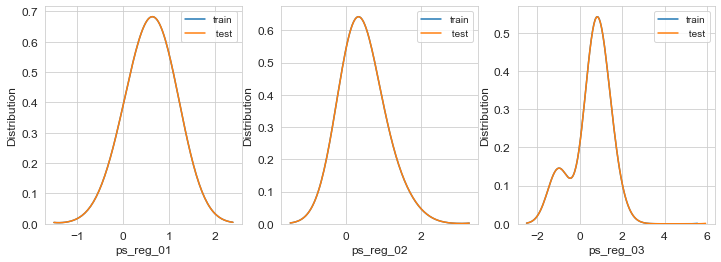

In [45]:
## 불균형 데이터 
var = metadata[(metadata.category == 'registration') & (metadata.preserve)].index

#bar plot

sns.set_style('whitegrid')

plt.figure()
fig, ax = plt.subplots(1,3,figsize = (12,4))
i = 0

for feature in var:
    i = i+1
    plt.subplot(1,3,i)
    sns.kdeplot(trainset[feature],bw = 0.5,label = 'train')
    sns.kdeplot(testset[feature],bw = 0.5, label =' test')
    plt.ylabel('Distribution', fontsize =12)
    plt.xlabel(feature, fontsize = 12)
    locs, labels = plt.xticks()
    
    ##plt.setp(labls,rotation= 90)
    plt.tick_params(axis = 'both', which = 'major', labelsize =12)
    
plt.show()

train, test set에대해서 동일한 분포를 가지고 있음

<Figure size 432x288 with 0 Axes>

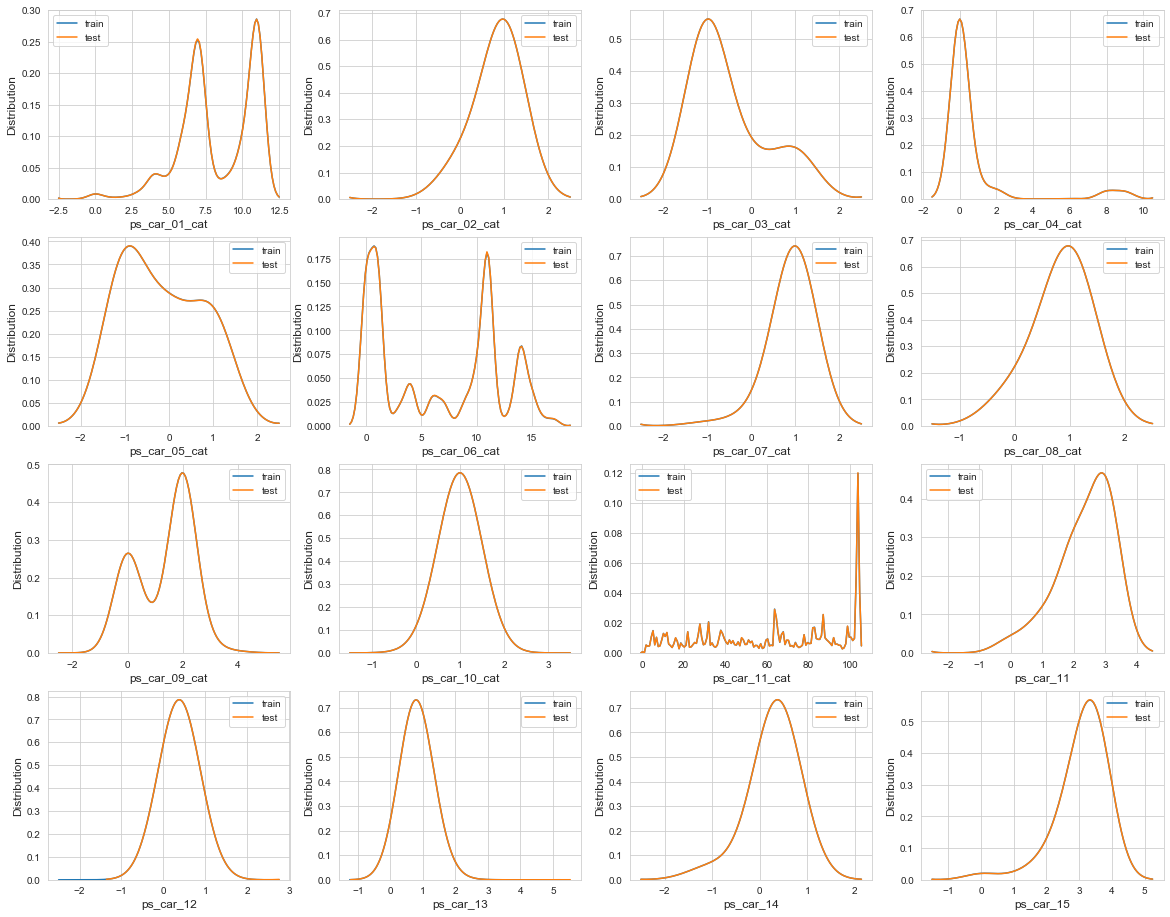

In [34]:
var = metadata[(metadata.category =='car') & (metadata.preserve)].index

#bar plot
sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(4,4,figsize = (20,16))
i = 0

for feature in var:
    i = i+1
    plt.subplot(4,4,i)
    sns.kdeplot(trainset[feature], bw = 0.5, label = 'train')
    sns.kdeplot(testset[feature], bw = 0.5, label = 'test')
    plt.ylabel('Distribution', fontsize =12)
    plt.xlabel(feature, fontsize =12)
    locs, labels = plt.xticks()
    #plt.setp(labels, rotataion =90)
    plt.tick_params(axis = 'both', which = 'majoir',labelsize = 12)
plt.show()

train, test set에대해서 동일한 분포를 가지고 있음

<Figure size 432x288 with 0 Axes>

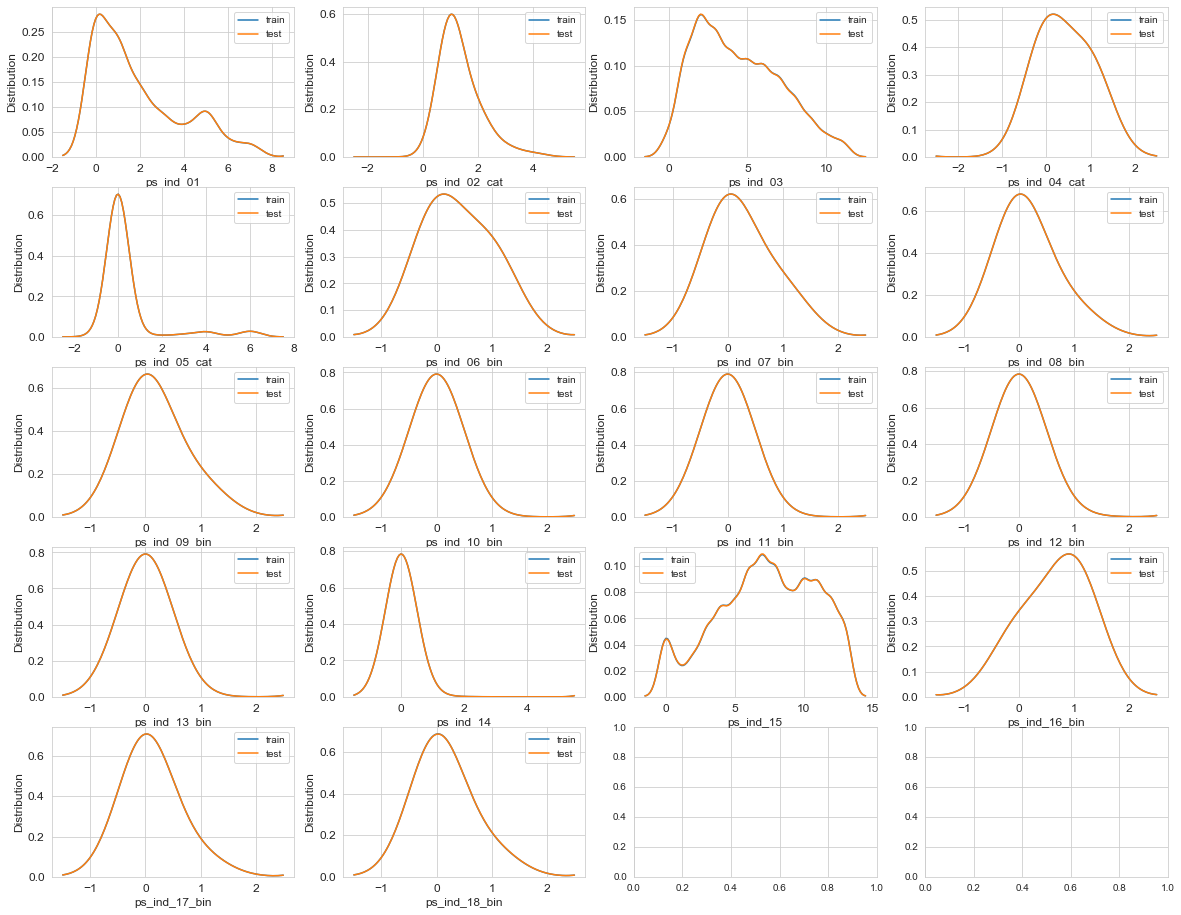

In [35]:
var = metadata[(metadata.category =='individual') & (metadata.preserve)].index
#bar plot
sns.set_style('whitegrid')

plt.figure()
fig, ax = plt.subplots(5,4,figsize = (20,16))
i = 0
for feature in var:
    i = i+1
    plt.subplot(5,4,i)
    sns.kdeplot(trainset[feature],bw = 0.5, label = 'train')
    sns.kdeplot(testset[feature], bw = 0.5, label ='test')
    plt.ylabel('Distribution', fontsize =12)
    plt.xlabel(feature, fontsize = 12)
    locs, labels = plt.xticks()
    ##plt.sept(labels, rotation =90)
    plt.tick_params(axis = 'both', which = 'major', labelsize =12)
plt.show()

train, test set에대해서 동일한 분포를 가지고 있음

<Figure size 432x288 with 0 Axes>

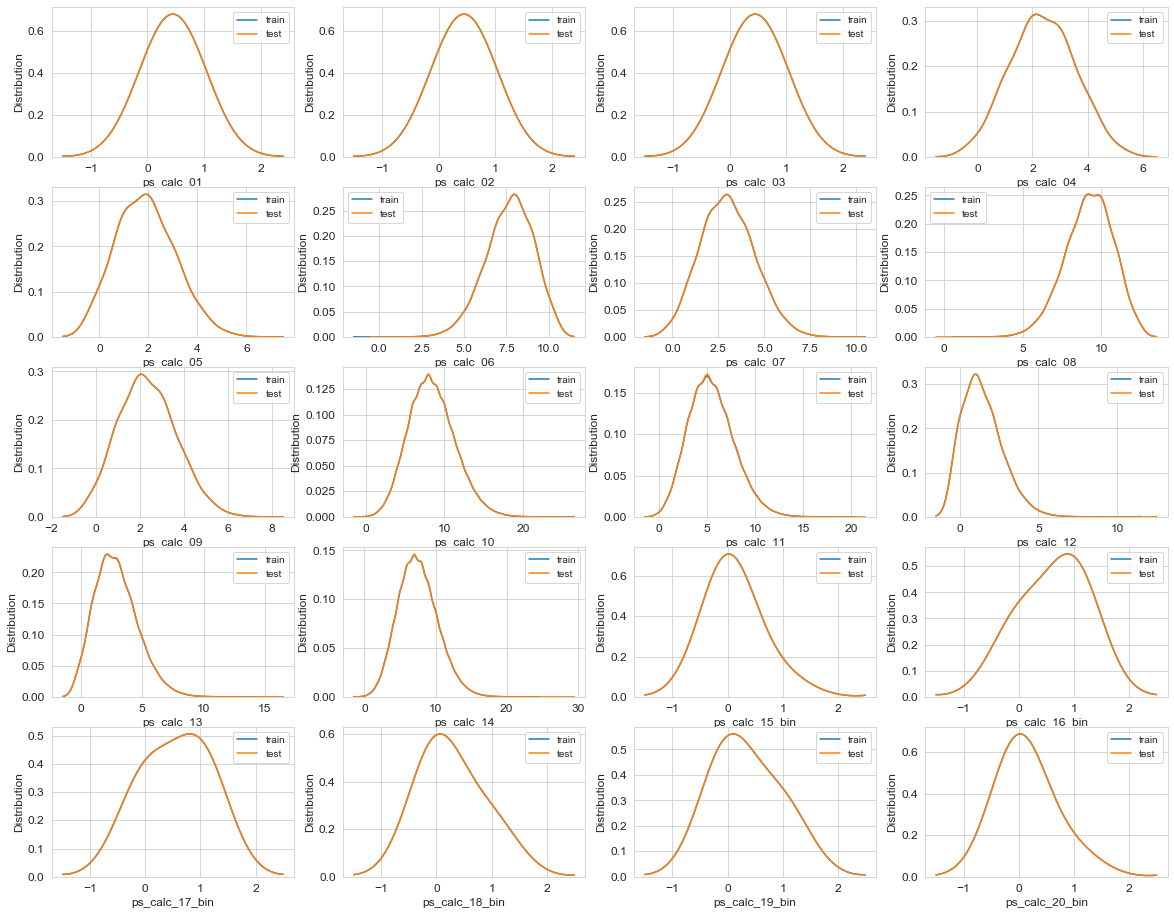

In [37]:
var = metadata[(metadata.category =='calculated') &(metadata.preserve)].index
#bar plot
sns.set_style('whitegrid')

plt.figure()
fig, ax = plt.subplots(5,4,figsize =(20,16))
i = 0
for feature in var:
    i = i+1
    plt.subplot(5,4,i)
    sns.kdeplot(trainset[feature], bw = 0.5, label = 'train')
    sns.kdeplot(testset[feature], bw = 0.5, label = 'test')
    plt.ylabel('Distribution', fontsize =12)
    plt.xlabel(feature, fontsize =12)
    locs, labels =plt.xticks()
    plt.tick_params(axis = 'both', which = 'major',labelsize =12)
plt.show()

train, test set에대해서 동일한 분포를 가지고 있음

데이터 품질확인

In [47]:
vars_with_missing = []

for feature in trainset.columns:
    missings = trainset[trainset[feature] == -1][feature].count()   ## 결측값 수 파악 
    if missings > 0:              
        vars_with_missing.append(feature)
        missings_perc = missings/trainset.shape[0]   ## 비율 계산  결측값 수 / 전체 행
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(feature, missings, missings_perc))
        
        print('In total, there are {} vriables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 216 records (0.04%) with missing values
In total, there are 1 vriables with missing values
Variable ps_ind_04_cat has 83 records (0.01%) with missing values
In total, there are 2 vriables with missing values
Variable ps_ind_05_cat has 5809 records (0.98%) with missing values
In total, there are 3 vriables with missing values
Variable ps_reg_03 has 107772 records (18.11%) with missing values
In total, there are 4 vriables with missing values
Variable ps_car_01_cat has 107 records (0.02%) with missing values
In total, there are 5 vriables with missing values
Variable ps_car_02_cat has 5 records (0.00%) with missing values
In total, there are 6 vriables with missing values
Variable ps_car_03_cat has 411231 records (69.09%) with missing values
In total, there are 7 vriables with missing values
Variable ps_car_05_cat has 266551 records (44.78%) with missing values
In total, there are 8 vriables with missing values
Variable ps_car_07_cat has 11489 records (1.93%) w

##모델은 위한 데이터 준비 

In [6]:
col_to_drop = trainset.columns[trainset.columns.str.startswith('ps_calc_')]
trainset = trainset.drop(col_to_drop, axis =1)
testset = testset.drop(col_to_drop, axis =1)

In [7]:
trainset.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000


In [8]:
vars_to_drop = ['ps_car_03_cat','ps_car_05_cat']
trainset.drop(vars_to_drop, inplace = True, axis =1)
testset.drop(vars_to_drop, inplace = True,axis =1)
metadata.loc[(vars_to_drop),'keep'] = False

#trainset.columns[trainset.columns.str.startswith('ps_calc_')]

In [9]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
   
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

?????????????

In [10]:
## 
train_encoded, test_encoded = target_encode(trainset["ps_car_11_cat"], 
                             testset["ps_car_11_cat"], 
                             target=trainset.target, 
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)

trainset['ps_car_11_cat_te'] = train_encoded
trainset.drop('ps_car_11_cat', axis = 1, inplace = True)
metadata.loc['ps_car_11_cat', 'keep']= False
testset['ps_car_11_cat_te'] = test_encoded
testset.drop('ps_car_11_cat', axis = 1, inplace = True)


In [13]:
trainset[trainset.target==0].index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,     10,
            ...
            595202, 595203, 595204, 595205, 595206, 595207, 595208, 595209,
            595210, 595211],
           dtype='int64', length=573518)

In [14]:
trainset[trainset.target==1].index

Int64Index([     9,     19,     28,     39,     41,     65,     87,    108,
               191,    224,
            ...
            594968, 594975, 594980, 594982, 594985, 595006, 595046, 595099,
            595113, 595158],
           dtype='int64', length=21694)

In [22]:
a=len(trainset.loc[trainset[trainset.target==0].index])
a

573518

In [23]:
b=len(trainset.loc[trainset[trainset.target==1].index])
b

21694

In [21]:
int(((1-0.1)*b)/(a*0.1)*a)

195246

## 데이터 균형 데이터 크기가커서 언더샘플링

In [31]:
desired_apriori = 0.10
# 종속 변수 얻기 
idx_0 = trainset[trainset.target == 0].index
idx_1 = trainset[trainset.target == 1].index

##
nb_0 = len(trainset.loc[idx_0])
nb_1 = len(trainset.loc[idx_1])

#언더샘플링 값 계산 

undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)
print('Rate to undersample records with target = 0: {}'.format(undersampling_rate))
print('Number of records with target = 0 after undersampling:{}'.format(undersampled_nb_0))

#
undersampled_idx = shuffle(idx_0, random_state = 314, n_samples =undersampled_nb_0) ## 언더샘플링 변수 섞어준다
##random_state : 난수 시드   / n_samples : 표본 데이터의 수 (디폴트 100) / n_features: 독립변수의 수 
idx_list = list(undersampled_idx)+list(idx_1)  ## 데이터 합치기 

trainset = trainset.loc[idx_list].reset_index(drop =True)  ## 기존의 행을 제거하고 인덱스를 다시 데이터 열로 추가 
# drop =True  기존의 인덱스는 삭제함

Rate to undersample records with target = 0: 0.34043569687437886
Number of records with target = 0 after undersampling:195246


In [32]:
##결측값 교체   -1 >>> Nan

trainset = trainset.replace(-1,np.nan)
testset = testset.replace(-1,np.nan)


In [33]:
## 범주형 더미화 
cat_features = [a for a in trainset.columns if a.endswith('cat')]  ## 만약 컬럼이 끝자리가 'cat' 인 컬럼만 선택

for column in cat_features:
    temp = pd.get_dummies(pd.Series(trainset[column]))
    trainset = pd.concat([trainset,temp], axis =1)
    trainset = trainset.drop([column],axis = 1)
    
for column in cat_features:
    temp = pd.get_dummies(pd.Series(testset[column]))
    testset = pd.concat([testset, temp], axis =1)  ## axis 옆으로 데이터 연결 
    testset = testset.drop([column], axis =1) ## 컬럼 제거 

In [34]:
trainset.head()

,id,target,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_car_11_cat_te,1.0,2.0,3.0,4.0,0.0,1.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,0.0,1.0,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,0.0,1.0,0,1,0.0,1.0,2.0,3.0,4.0,0,1,2
0,321914,0,1,4,0,1,0,0,0,1,0,0,1,0,0,0,1,0.9,0.2,0.436606,3.0,0.316228,0.662140,0.301662,3.162278,0.028834,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0
1,942842,0,6,4,0,0,0,1,0,0,0,0,0,8,1,0,0,0.7,0.1,0.520817,2.0,0.400000,0.842750,0.401373,3.316625,0.027829,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0
2,995457,0,5,9,0,0,1,0,0,0,0,0,0,10,0,0,0,0.8,1.3,1.462660,3.0,0.400000,0.716655,0.330908,2.645751,0.031083,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,202081,0,0,9,0,1,0,0,0,0,0,0,0,10,0,0,0,0.3,0.0,NaN,2.0,0.447214,1.108756,0.325576,3.464102,0.041551,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0
4,1295934,0,0,10,0,0,0,1,0,0,0,0,0,10,0,0,0,0.7,0.2,0.692369,2.0,0.500000,0.928075,0.383275,2.828427,0.045925,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0


In [35]:
id_test = testset['id'].values
target_train = trainset['target'].values

trainset = trainset.drop(['target','id'], axis =1)
testset = testset.drop(['id'], axis =1)

In [36]:
print('Train dataset (rows, cols):', trainset.values.shape , '\nTest dataset(rows, cols):', testset.values.shape)

Train dataset (rows, cols): (216940, 91) 
Test dataset(rows, cols): (892816, 91)


모델 준비

In [41]:
class Ensemble(object):
    def __init__(self, n_splits, stacker, base_models):
        self.n_splits = n_splits
        self.stacker = stacker
        self.base_models = base_models
    
    def fit_predict(self, X, y, T):
        X = np.array(X)
        y = np.array(y)
        T = np.array(T)
        
        folds = list(StratifiedKFold(n_splits = self.n_splits, shuffle =True, random_state = 314).split(X,y))
        
        S_train = np.zeros((X.shape[0], len(self.base_models))) # np.zeros 행 X의 shape 만큼 행 개수, model 계수만큼 열 개수 / 모델 결과값 넣는 곳
        S_test = np.zeros((T.shape[0], len(self.base_models)))  # S_test 결과
        for i, clf in enumerate(self.base_models):  ## enumerate 인덱스와 값 반환
            
            S_test_i = np.zeros((T.shape[0], self.n_splits))
            
            for j, (train_idx, test_idx) in enumerate(folds):
                X_train = X[train_idx]
                y_train = y[train_idx]
                X_holdout = X[test_idx]
                
                print('Base model %d: fit %s model | fold %d' % (i+1, str(clf).split('(')[0],j+1))
                
                clf.fit(X_train, y_train)
                cross_score = cross_val_score(clf,X_train, y_train, cv = 3, scoring = 'roc_auc')
                print('cross_score [roc-auc]: %.5f [gini]: %.5f' % (cross_score.mean(), 2*cross_score.mean()-1))
                
                y_pred = clf.predict_proba(X_holdout)[:,1]
                # test_idx에  i번째
                # splits가 3번이면 3번을 다 들면 모든 인덱스가 다 나오겐 된다!!
                S_train[test_idx, i] = y_pred
                S_test_i[:, j] = clf.predict_proba(T)[:,1]
            # train에다가는 validation을 넣어주고, test에는 실제 test 예측값을 넣어준다. 
            S_test[:, i] = S_test_i.mean(axis=1)
            results = cross_val_score(self.stacker, S_train, y, cv =3 ,scoring = 'roc_auc')
            
            print('Stacker score [gini]: %.5f' %(2*results.mean() - 1))
            

            self.stacker.fit(S_train, y)
            res = self.stacker.predict_proba(S_test)[:,1]
            return res
                
            

계층별 k-겹 교차검증  
- 데이터가 편향되어 있을 경우 stratified k-fold 
매개변수
n_splits: 몇개로 분할할지
shuffle : 분할하기잔에 무작위로 섞는다-True
random_state : 난수 시드 


In [40]:
trainset.shape

(216940, 91)

## 기본 모델에 대한 파라미터

In [42]:
#lgb_1 
lgb_params1 = {}
lgb_params1['learning_rate'] = 0.02
lgb_params1['n_estimators'] = 650
lgb_params1['max_bin'] = 10
lgb_params1['subsample'] = 0.8
lgb_params1['subsample_freq'] =10
lgb_params1['colsample_bytree'] =0.8
lgb_params1['min_child_samples'] = 500
lgb_params1['seed'] =314
lgb_params1['num_threads'] =4

#lgb2
lgb_params2 = {}
lgb_params2['n_estimators'] = 1090
lgb_params2['learning_rate'] = 0.02
lgb_params2['colsample_bytree'] = 0.3
lgb_params2['subsample'] = 0.7
lgb_params2['subsample_freq'] =2
lgb_params2['num_leaves'] =16
lgb_params2['seed'] =314
lgb_params2['num_threads'] =4

#lgb3
lgb_params3 = {}
lgb_params3['n_estimators'] = 1100
lgb_params3['max_depth'] = 4
lgb_params3['learning_rate'] = 0.02
lgb_params3['seed'] =314
lgb_params3['num_threads'] = 4

#XGBoost params
xgb_params = {}
xgb_params['objective'] = 'binary : logistic'
xgb_params['learning_rate'] = 0.04
xgb_params['n_estimators'] = 490
xgb_params['max_depth'] = 4
xgb_params['subsample'] = 0.9
xgb_params['colsample_bytree'] =0.9
xgb_params['min_child_weight'] = 10
xgb_params['num_threads'] =4

##  파라미터 설정하기 

In [43]:
#기본 모델 
lgb_model1 = LGBMClassifier(**lgb_params1)
lgb_model2 = LGBMClassifier(**lgb_params2)
lgb_model3 = LGBMClassifier(**lgb_params3)
xgb_model = XGBClassifier(**xgb_params)

## 스태킹 모델 
log_model = LogisticRegression()

## 앙상블 객체 설정하기 

In [44]:
stack = Ensemble(n_splits = 3,
                stacker = log_model,
                base_models = (lgb_model1, lgb_model2, lgb_model3,xgb_model))

In [45]:
## 모델 예측 
y_prediction = stack.fit_predict(trainset, target_train, testset)

Base model 1: fit LGBMClassifier model | fold 1
cross_score [roc-auc]: 0.64194 [gini]: 0.28389
Base model 1: fit LGBMClassifier model | fold 2
cross_score [roc-auc]: 0.63693 [gini]: 0.27385
Base model 1: fit LGBMClassifier model | fold 3
cross_score [roc-auc]: 0.63404 [gini]: 0.26807


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Stacker score [gini]: 0.28263


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [84]:
submission = pd.DataFrame()
submission['id'] = id_test
submission['target'] = y_prediction
submission.to_csv('stacked.csv', index =False)